In [1]:
%run Data.ipynb

In [79]:
%run Functions.ipynb

In [59]:
Graph_folder = 'G:\My Drive\Բակալավրիատ\8 կիսամյակ\Դիպլոմ\Results\Graphs/'

# Checking Linearity with respect to Concentrations

In [80]:
TMAO_Limit = Finde_Pure(TMAO, n_TMAO, NaPB)

In [95]:
TMAO_Pred = NaPB[None, :]*(1-n_TMAO[:, None]) + TMAO_Limit[None, :]*n_TMAO[:, None]
TMAO_Deviation = ((TMAO - TMAO_Pred)**2).mean(axis=0)**.5

PEG_Pred = NaPB[None, :]*(1-n_PEG[:, None]) + PEG_Pure[None, :]*n_PEG[:, None]
PEG_Deviation = ((PEG - PEG_Pred)**2).mean(axis=0)**.5

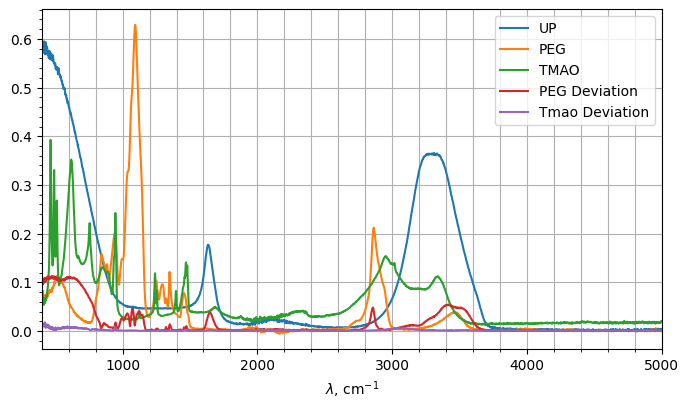

In [93]:
plt_spectrum_header()

plt.plot(Lambda, NaPB, label='UP')
plt.plot(Lambda, PEG_Pure, label='PEG')
plt.plot(Lambda, TMAO_Dry, label='TMAO')

plt.plot(Lambda, PEG_Deviation, label='PEG Deviation')
plt.plot(Lambda, TMAO_Deviation, label='Tmao Deviation')

plt.legend()
plt.savefig(Graph_folder + 'Deviation I')

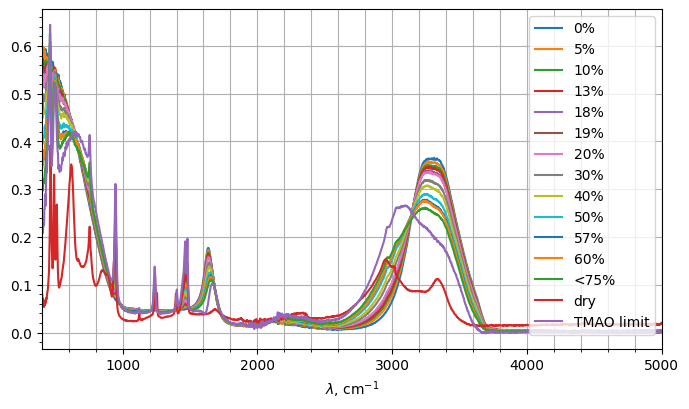

In [101]:
plt_spectrum_header()

for i in range(TMAO.shape[0]):
    plt.plot(Lambda, TMAO[i], label=str(int(n_TMAO[i]*100))+"%")
plt.plot(Lambda, TMAO_high, label="<75%")
plt.plot(Lambda, TMAO_Dry, label="dry")
plt.plot(Lambda, TMAO_Limit, label='TMAO limit')

plt.legend(loc='upper right')
plt.savefig(Graph_folder + 'TMAO limit')

# Linear Combination

In [29]:
C_PEG = Find_2Concentrations(PEG, PEG[0], PEG[-1])
Tabel = np.array([C_PEG.T[0], C_PEG.T[1], 1-n_PEG, n_PEG]).T
Tabel = pd.DataFrame(Tabel, columns = ['UP, расч.','PEG-600, расч.','UP','PEG-600'])
print(Tabel.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   UP, расч. &  PEG-600, расч. &   UP &  PEG-600 \\
\midrule
1.000000e+00 &   -6.155869e-19 & 1.00 &     0.00 \\
9.494247e-01 &    1.066727e-01 & 0.85 &     0.15 \\
8.769329e-01 &    2.261623e-01 & 0.70 &     0.30 \\
8.205656e-01 &    3.090660e-01 & 0.61 &     0.39 \\
7.003624e-01 &    4.562255e-01 & 0.46 &     0.54 \\
6.676758e-01 &    4.948701e-01 & 0.43 &     0.57 \\
6.536052e-01 &    5.074753e-01 & 0.40 &     0.60 \\
5.669207e-01 &    5.834835e-01 & 0.35 &     0.65 \\
5.063772e-01 &    6.401798e-01 & 0.30 &     0.70 \\
4.135770e-01 &    7.168941e-01 & 0.25 &     0.75 \\
3.847846e-01 &    7.331138e-01 & 0.20 &     0.80 \\
2.798498e-01 &    8.177246e-01 & 0.15 &     0.85 \\
2.060525e-01 &    8.714199e-01 & 0.10 &     0.90 \\
7.627109e-02 &    9.559659e-01 & 0.05 &     0.95 \\
7.891750e-19 &    1.000000e+00 & 0.00 &     1.00 \\
\bottomrule
\end{tabular}



In [106]:
C_TMAO = Find_2Concentrations(TMAO, TMAO[0], TMAO_Limit)
Tabel = np.array([C_TMAO.T[0], C_TMAO.T[1], 1-n_TMAO, n_TMAO]).T
Tabel = pd.DataFrame(Tabel, columns = ['UP, расч.','PEG-600, расч.','UP','PEG-600'])
print(Tabel.to_latex(index=False))

c = Find_2Concentrations([TMAO_high], TMAO[0], TMAO_Limit)
print(c)

\begin{tabular}{rrrr}
\toprule
 UP, расч. &  PEG-600, расч. &   UP &  PEG-600 \\
\midrule
  1.000000 &    3.171121e-18 & 1.00 &     0.00 \\
  0.947698 &    5.954423e-02 & 0.95 &     0.05 \\
  0.903562 &    1.069182e-01 & 0.90 &     0.10 \\
  0.869506 &    1.430279e-01 & 0.87 &     0.13 \\
  0.822002 &    1.934839e-01 & 0.82 &     0.18 \\
  0.811642 &    2.041253e-01 & 0.81 &     0.19 \\
  0.801310 &    2.144616e-01 & 0.80 &     0.20 \\
  0.696046 &    3.144592e-01 & 0.70 &     0.30 \\
  0.614379 &    3.938533e-01 & 0.60 &     0.40 \\
  0.495898 &    5.035290e-01 & 0.50 &     0.50 \\
  0.411953 &    5.754597e-01 & 0.42 &     0.58 \\
  0.401736 &    5.802066e-01 & 0.40 &     0.60 \\
\bottomrule
\end{tabular}

[[0.3154195  0.65395099]]


In [99]:
C_Below = Find_3Concentrations(Below, NaPB, TMAO_Limit, PEG_Pure)
Tabel = np.array([C_Below.T[0], C_Below.T[1], C_Below.T[2], n_Below[0], n_Below[1], n_Below[2]]).T
Tabel = pd.DataFrame(Tabel, columns = ['UP, расч.', 'TMAO, расч.' ,'PEG, расч.', 'UP', 'TMAO' ,'PEG'])
print(Tabel.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 UP, расч. &  TMAO, расч. &  PEG, расч. &   UP &  TMAO &  PEG \\
\midrule
  0.872110 &     0.068067 &    0.106897 & 0.80 &  0.05 & 0.15 \\
  0.748020 &     0.115832 &    0.225053 & 0.60 &  0.10 & 0.30 \\
  0.652048 &     0.135191 &    0.317978 & 0.48 &  0.13 & 0.39 \\
\bottomrule
\end{tabular}



In [100]:
C_Above = Find_3Concentrations(Above, NaPB, TMAO_Limit, PEG_Pure)
Tabel = np.array([C_Above.T[0], C_Above.T[1], C_Above.T[2], n_Above[0], n_Above[1], n_Above[2]]).T
Tabel = pd.DataFrame(Tabel, columns = ['UP, расч.', 'TMAO, расч.' ,'PEG, расч.', 'UP', 'TMAO' ,'PEG'])
print(Tabel.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 UP, расч. &  TMAO, расч. &  PEG, расч. &   UP &  TMAO &  PEG \\
\midrule
  0.294190 &     0.036112 &    0.756778 & 0.20 &  0.20 & 0.60 \\
  0.361577 &     0.057279 &    0.680184 & 0.24 &  0.19 & 0.57 \\
  0.452068 &     0.127049 &    0.521502 & 0.28 &  0.18 & 0.54 \\
  0.428785 &     0.253030 &    0.376570 & 0.28 &  0.18 & 0.54 \\
  0.420413 &     0.442031 &    0.160804 & 0.24 &  0.19 & 0.57 \\
  0.386775 &     0.535651 &    0.076778 & 0.20 &  0.20 & 0.60 \\
\bottomrule
\end{tabular}



In [107]:
PEG_Pred = C_PEG[:, None, 0]*NaPB[None, :] + C_PEG[:, None, 1]*PEG_Pure[None, :]
TMAO_Pred = C_TMAO[:, None, 0]*NaPB[None, :] + C_TMAO[:, None, 1]*TMAO_Limit[None, :]
Below_Pred = C_Below[:, None, 0]*NaPB[None, :] + C_Below[:, None, 1]*TMAO_Limit[None, :] + C_Below[:, None, 2]*PEG_Pure[None, :]
Above_Pred = C_Above[:, None, 0]*NaPB[None, :] + C_Above[:, None, 1]*TMAO_Limit[None, :] + C_Above[:, None, 2]*PEG_Pure[None, :]

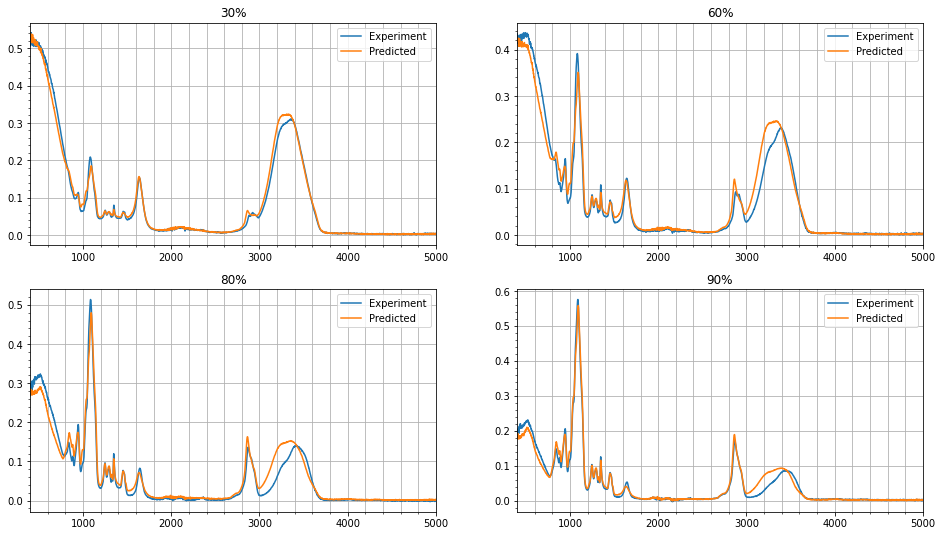

In [108]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(9)
fig.set_figwidth(16)

ixs = [[2, 6],
       [10, 12]]

for ax, ix in zip(axs, ixs):
    for a, i in zip(ax, ix):
        a.minorticks_on()
        a.xaxis.grid(True, which='both')
        a.yaxis.grid(True, which='major')
        a.set_xlim([400, 5000])
        a.set_title(str(int(n_PEG[i]*100))+"%")
        a.plot(Lambda, PEG[i], label='Experiment')
        a.plot(Lambda, PEG_Pred[i], label='Predicted')
        a.legend()

plt.savefig(Graph_folder + 'PEG pred')

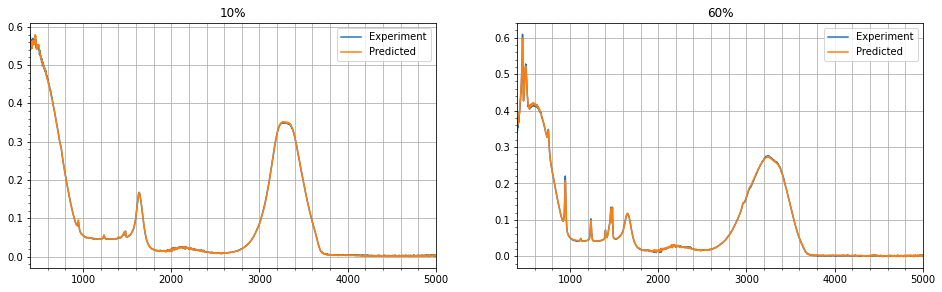

In [125]:
fig, axs = plt.subplots(1, 2)

fig.set_figheight(4.5)
fig.set_figwidth(16)

ixs = [2, 11]

for a, i in zip(axs, ixs):
    a.minorticks_on()
    a.xaxis.grid(True, which='both')
    a.yaxis.grid(True, which='major')
    a.set_xlim([400, 5000])
    a.set_title(str(int(n_TMAO[i]*100))+"%")
    a.plot(Lambda, TMAO[i], label='Experiment')
    a.plot(Lambda, TMAO_Pred[i], label='Predicted')
    a.legend()

plt.savefig(Graph_folder + 'TMAO pred')

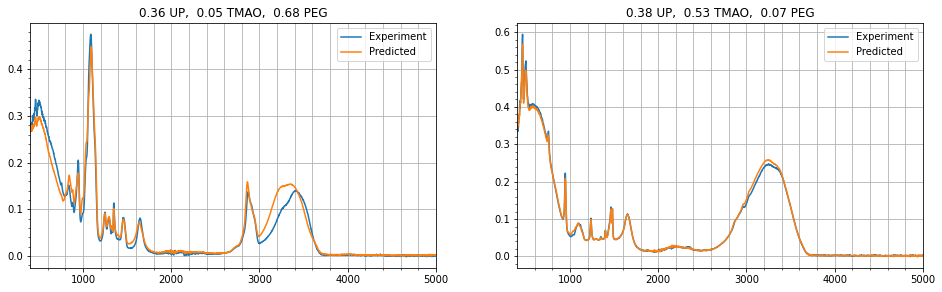

In [123]:
fig, axs = plt.subplots(1, 2)

fig.set_figheight(4.5)
fig.set_figwidth(16)

ixs = [1, 5]

for a, i in zip(axs, ixs):
    a.minorticks_on()
    a.xaxis.grid(True, which='both')
    a.yaxis.grid(True, which='major')
    a.set_xlim([400, 5000])
    
    title = ''
    for j, n in enumerate(['UP', 'TMAO', 'PEG']):
        title += str(int(C_Above[i, j]*100)/100)+' ' + n + ',  '
    title = title[:-3]
    
    a.set_title(title)
    a.plot(Lambda, Above[i], label='Experiment')
    a.plot(Lambda, Above_Pred[i], label='Predicted')
    a.legend()

plt.savefig(Graph_folder + 'Above pred')

# Two-Component Solutions

### Model
We assume that there are complexes of solvent and solute.

$f = c_0 f_0 + c_1 f_1 + c_{01} f_{01}$

$c_{01} = k {c_0^{\alpha_0} c_1^{\alpha_1}}$

$n_0 = c_0 + \alpha_0 c_{01}$

$n_1 = c_1 + \alpha_1 c_{01}$

### Variabels

$f$ is the absorbence fo the solution, 

$f_0$, $f_1$ and $f_{01}$ are there absorbencees of the components (solvent, solute and complex),

$c_0$, $c_1$ and $c_{01}$ are the concentrations,

$k$ is the raction coefficient

$\alpha_0$ and $\alpha_1$ are the numbers of atoms in the complex

$n_0$ and $n_1$ are the initia concentrations

# Phase I

In [18]:
Slice = slice(5,-4,5)

In [42]:
Results_PEG_I = Estimate_I(PEG, n_PEG)

  0%|          | 0/892 [00:00<?, ?it/s]

C:\Users\Davit\AppData\Local\Temp/ipykernel_2956/1779381096.py:32: RuntimeWarning: invalid value encountered in power
  c01_model = k * (np.power(c0, a0)) * (np.power(c1, a1))
C:\Users\Davit\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [24]:
k_I, a0_I, a1_I = get_k_a0_a1_I(Results_PEG_I)
c0_I, c1_I, c01_I = Concentrations(k_I, a0_I, a1_I, n_PEG)
f0_I, f1_I, f01_I = f0_f1_f01(c0_I, c1_I, c01_I, PEG[:, Slice])
PEG_pred = Predict(c0_I, c1_I, c01_I, f0_I, f1_I, f01_I)

#np.savetxt('../Results/k_I.txt',k_I)
#np.savetxt('../Results/a0_I.txt',a0_I)
#np.savetxt('../Results/a1_I.txt',a1_I)

C:\Users\Davit\AppData\Local\Temp/ipykernel_2956/1357775187.py:32: RuntimeWarning: invalid value encountered in power
  c01_model = k * np.power(c0, a0) * np.power(c1, a1)


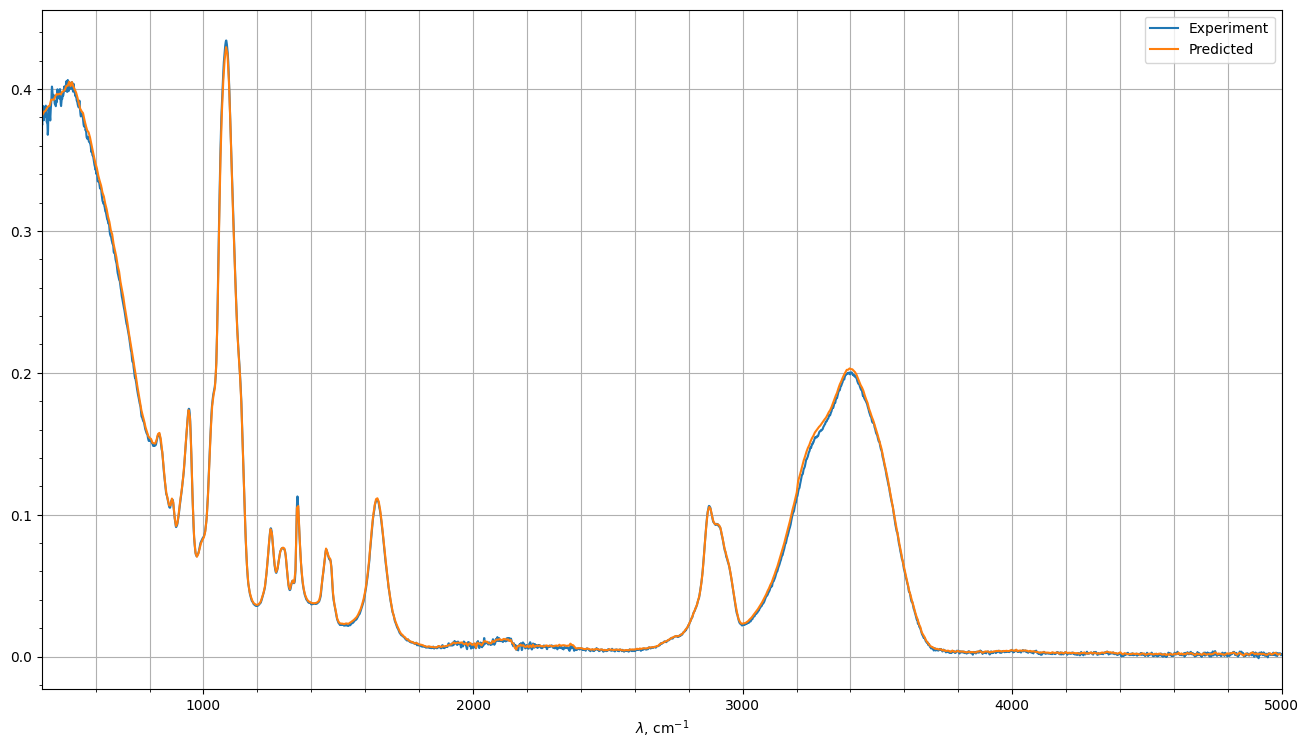

In [33]:
i = 7

plt_spectrum_header()

plt.plot(Lambda, PEG[i], label='Experiment')
plt.plot(Lambda[Slice], PEG_pred[i], label='Predicted')

plt.legend()

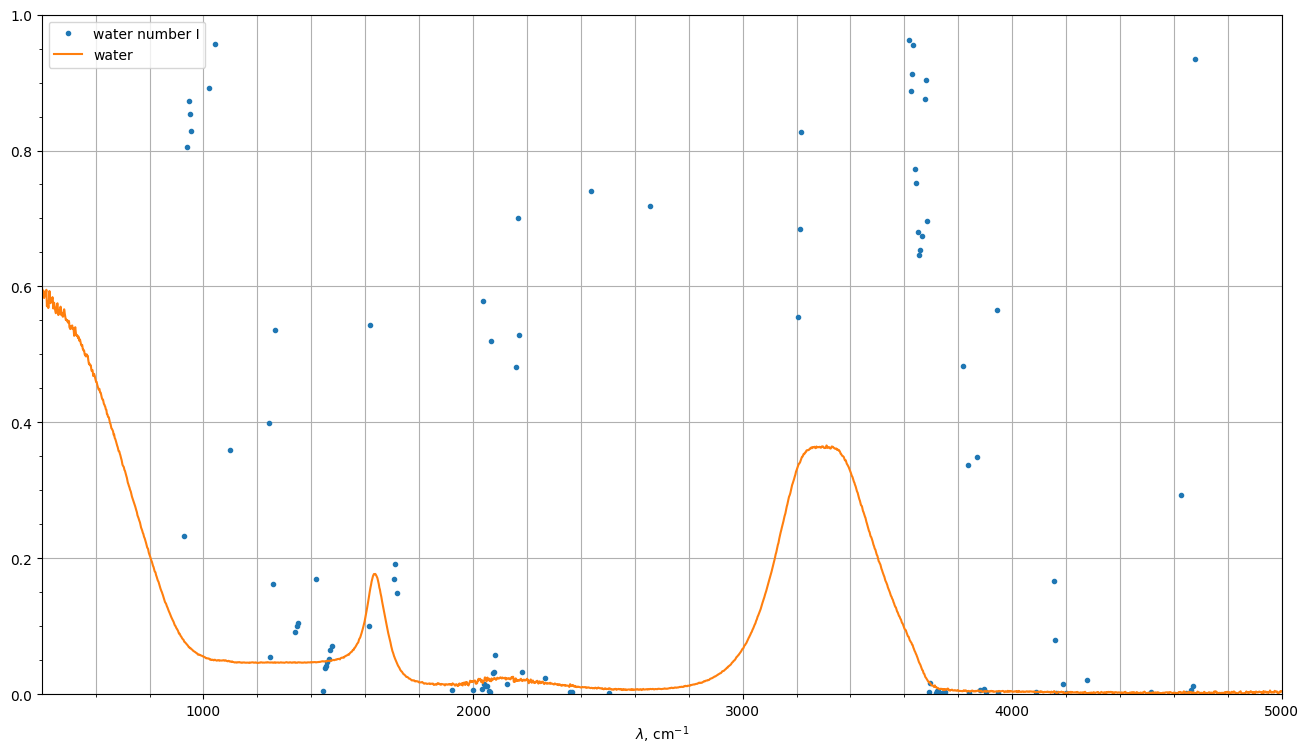

In [43]:
plt_spectrum_header()
plt.ylim(0,1)

plt.plot(Lambda[Slice], k_I, '.', label='water number I')
plt.plot(Lambda, NaPB, label='water')

plt.legend()

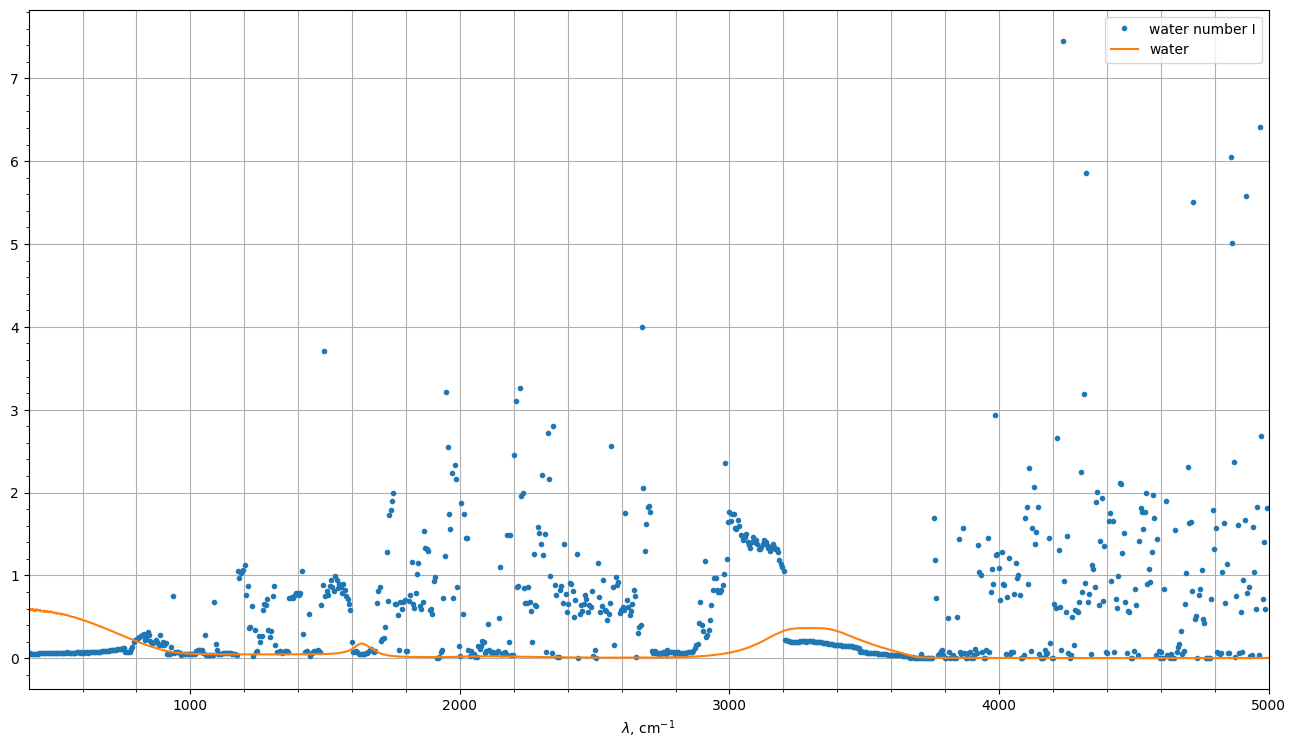

In [34]:
plt_spectrum_header()

plt.plot(Lambda[Slice], a0_I/10, '.', label='water number I')
plt.plot(Lambda, NaPB, label='water')

plt.legend()

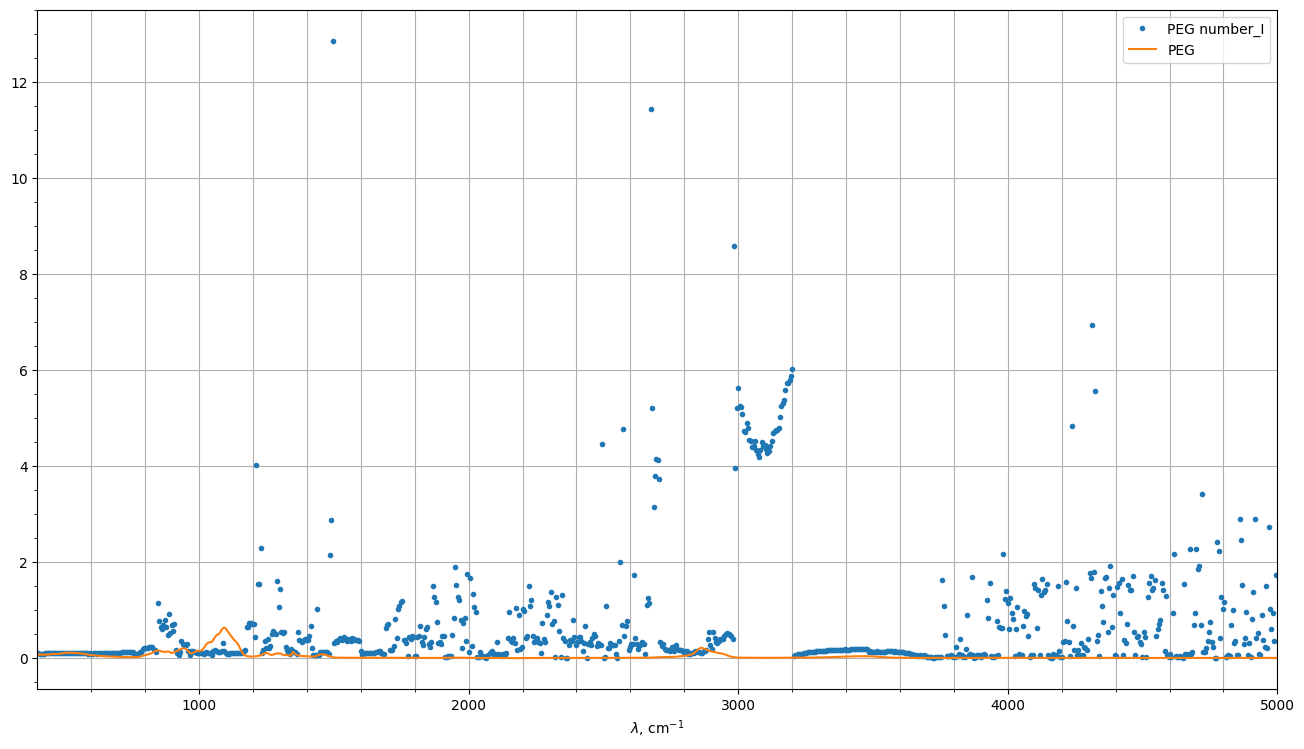

In [35]:
plt_spectrum_header()

plt.plot(Lambda[Slice], a1_I/10, '.', label='PEG number_I')
plt.plot(Lambda, PEG_Pure, label='PEG')

plt.legend()

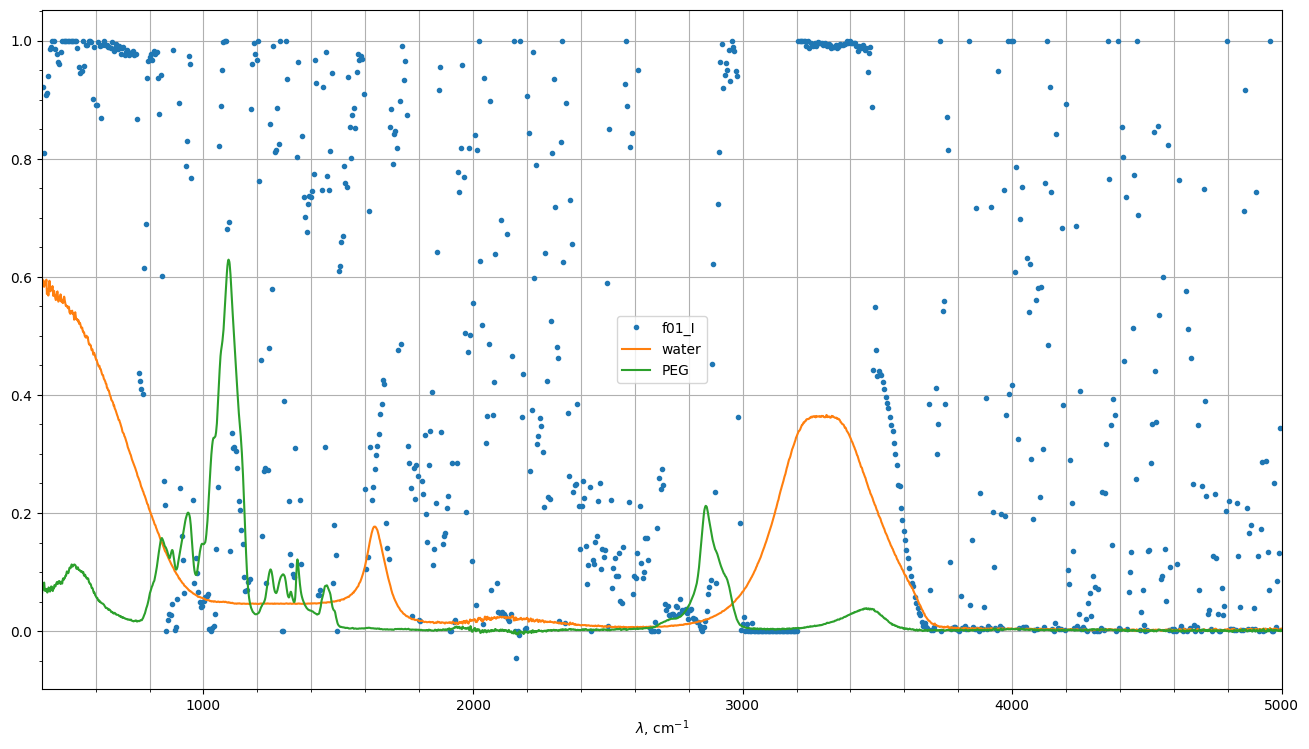

In [38]:
plt_spectrum_header()

plt.plot(Lambda[Slice], f01_I, '.', label='f01_I')
plt.plot(Lambda, NaPB, label='water')
plt.plot(Lambda, PEG_Pure, label='PEG')

plt.legend()

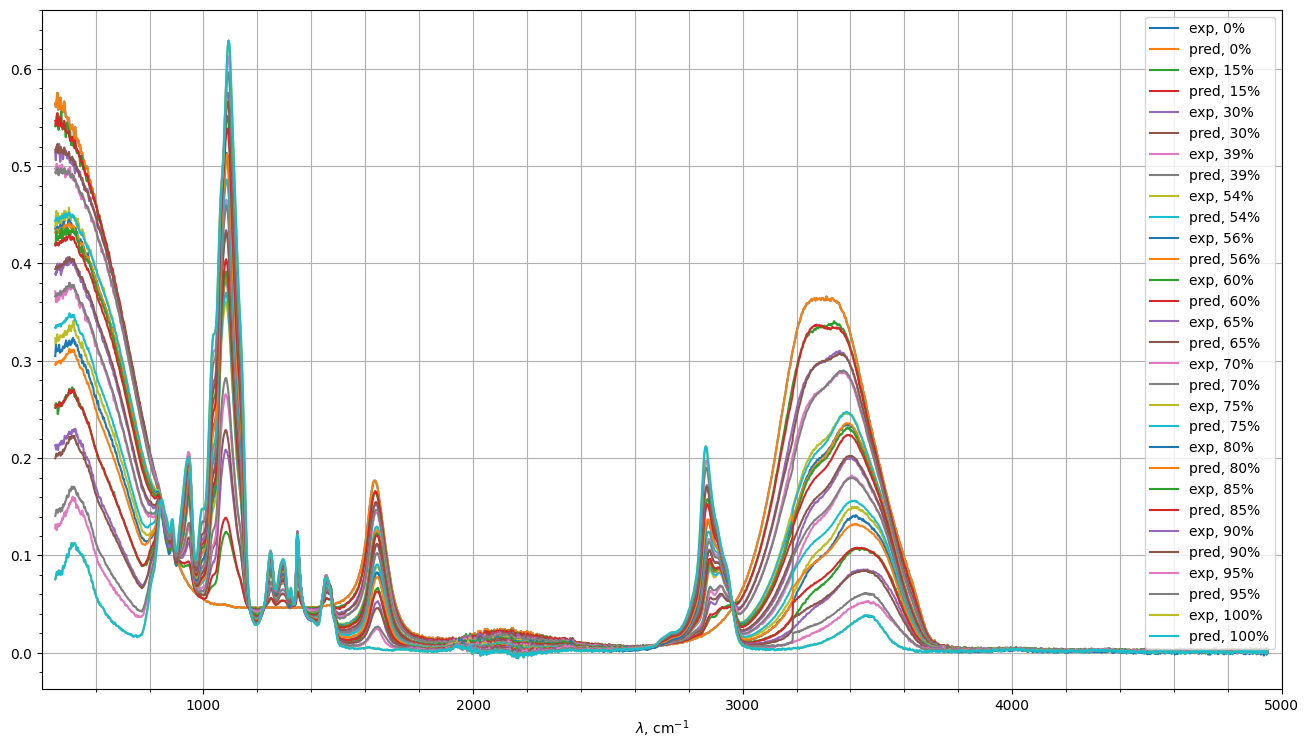

In [42]:
plt_spectrum_header()

for n, f, f_pred in zip(n_PEG, PEG, PEG_pred):
    plt.plot(Lambda[Slice], f[50:-49], label='exp, '+str(int(n*100))+'%')
    plt.plot(Lambda[Slice], f_pred, label='pred, '+str(int(n*100))+'%')
plt.legend()

# Phase II

In [4]:
History_PEG_II = []

In [7]:
Results_PEG_II = Estimate_Liquid_k_a0_a1_II(a0_I, a1_I, n_PEG, NaPB, PEG_Pure, PEG, History_PEG_II, batch=100)

  0%|          | 0/4366 [00:00<?, ?it/s]

In [8]:
k_II, a0_II, a1_II = get_k_a0_a1_II(Results_PEG_II)

np.savetxt('../Results/k_II.txt',k_II)
np.savetxt('../Results/a0_II.txt',a0_II)
np.savetxt('../Results/a1_II.txt',a1_II)

In [9]:
c0_II, c1_II, c01_II = Concentrations(k_II, a0_II, a1_II, n_PEG)

In [10]:
f01_II = Liquid_f01(c0_II, c1_II, c01_II, NaPB[50:-49], PEG_Pure[50:-49], PEG[:, 50:-49])

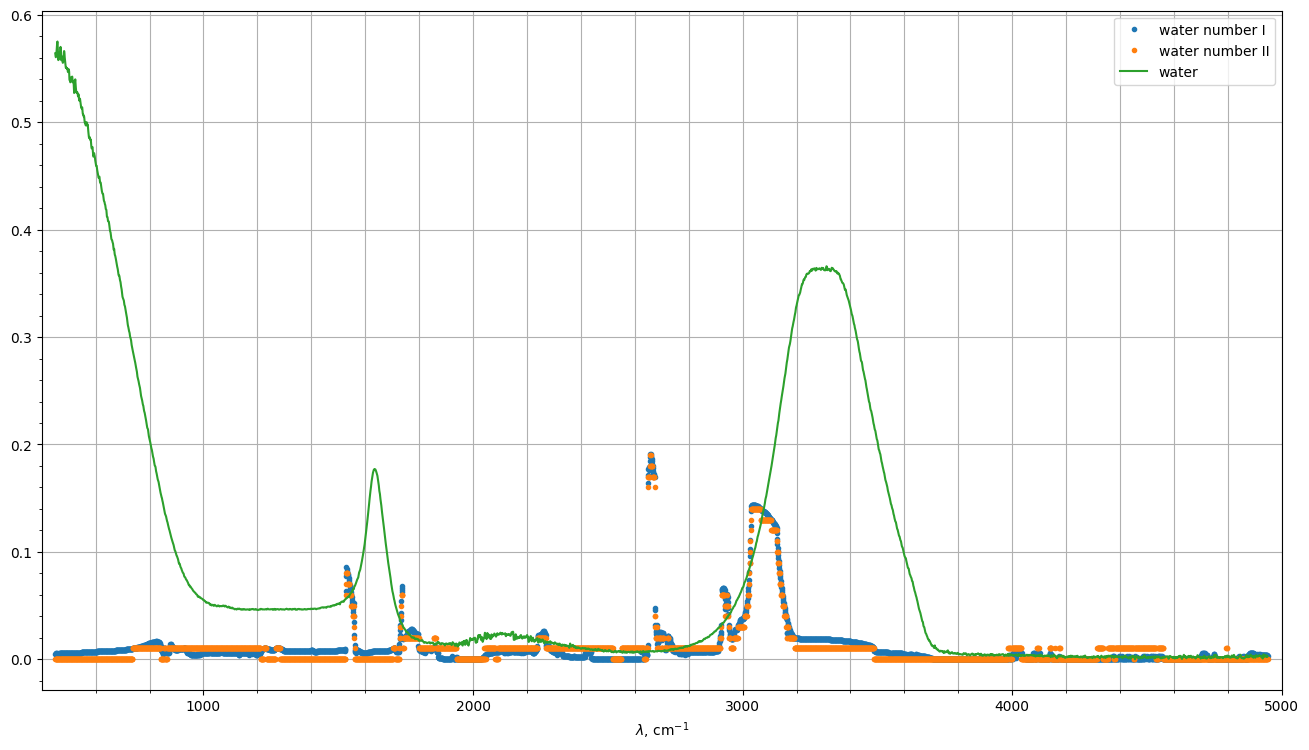

In [22]:
Lambda[Slice] = Lambda[50:-49]

plt_spectrum_header()

plt.plot(Lambda[Slice], a0_I/100, '.', label='water number I')
plt.plot(Lambda[Slice], a0_II/100, '.', label='water number II')
plt.plot(Lambda[Slice], NaPB[50:-49], label='water')


plt.legend()

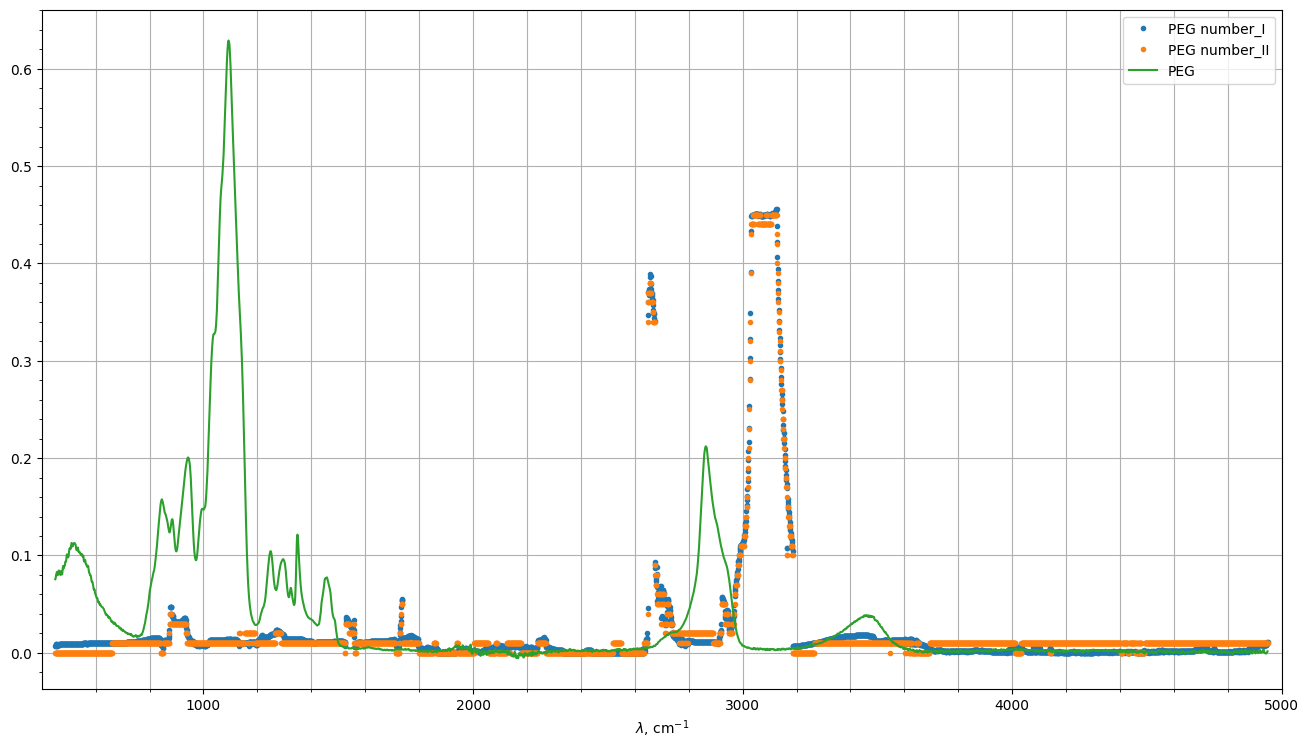

In [23]:
plt_spectrum_header()

plt.plot(Lambda[Slice], a1_I/100, '.', label='PEG number_I')
plt.plot(Lambda[Slice], a1_II/100, '.', label='PEG number_II')
plt.plot(Lambda[Slice], PEG_Pure[50:-49], label='PEG')

plt.legend()

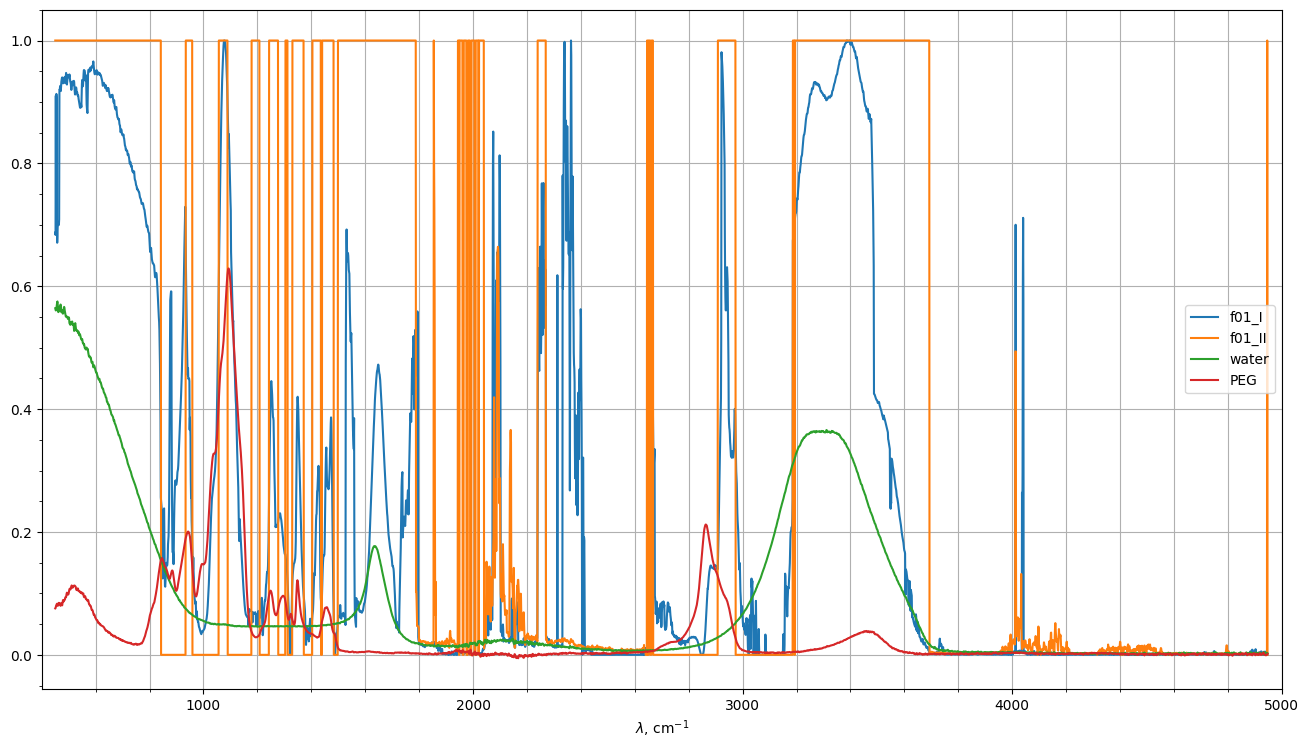

In [24]:
plt_spectrum_header()

plt.plot(Lambda[Slice], f01_I, label='f01_I')
plt.plot(Lambda[Slice], f01_II, label='f01_II')
plt.plot(Lambda[Slice], NaPB[50:-49], label='water')
plt.plot(Lambda[Slice], PEG_Pure[50:-49], label='PEG')

plt.legend()

In [15]:
PEG_pred = Predict(k_II, a0_II, a1_II, n_PEG, NaPB[50:-49], PEG_Pure[50:-49], f01_II)

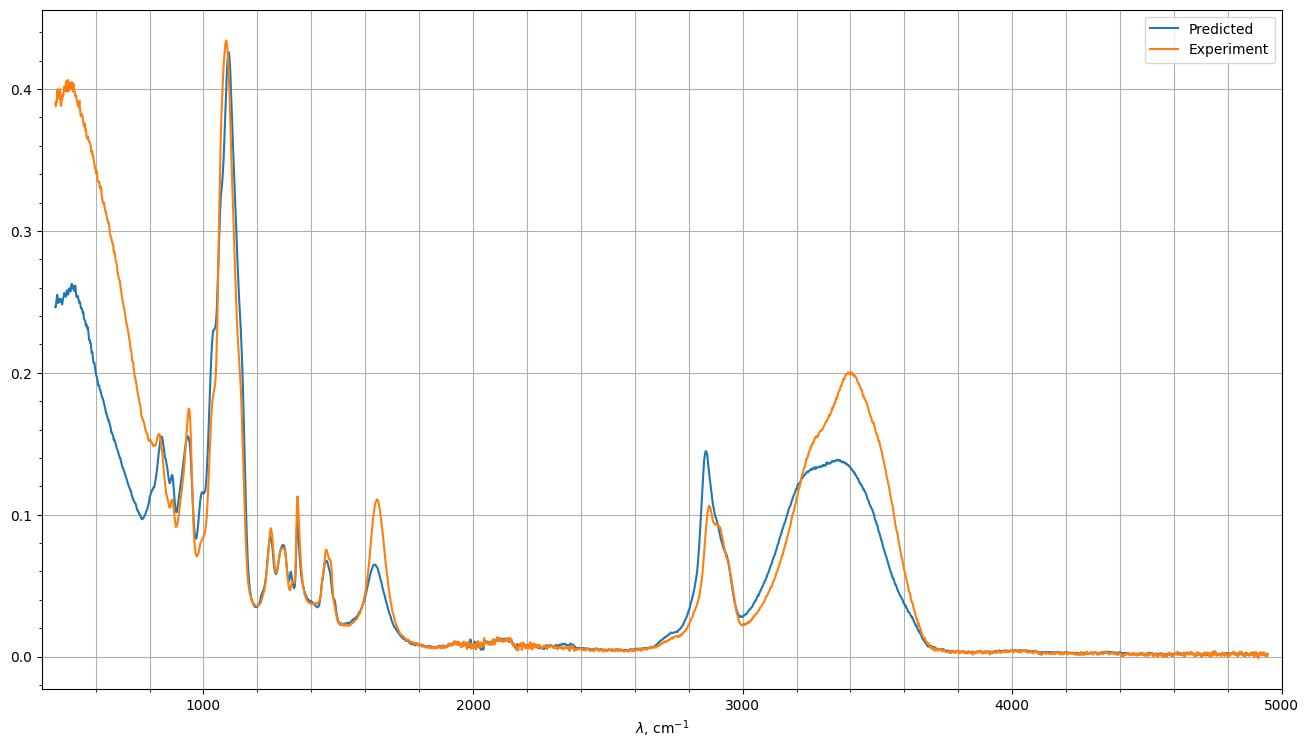

In [27]:
i = 7

plt_spectrum_header()

plt.plot(Lambda[Slice], PEG_pred[i], label='Predicted')
plt.plot(Lambda[Slice], PEG[i,50:-49], label='Experiment')

plt.legend()

BSA protein, фикол, декстран